<a href="https://colab.research.google.com/github/himanshi18037/WhatAPhish/blob/main/Data_Analysis_and_Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from scipy.io import arff
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

In [6]:
def getProcessedDataFrame(filepath):
  dataset = arff.loadarff(filepath)
  df = pd.DataFrame(dataset[0])
  str_df = df.select_dtypes([np.object]) 
  str_df = str_df.stack().str.decode('utf-8').unstack()

  for col in str_df.columns:
    str_df[col] = str_df[col].astype(int)
  return str_df

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
complete_training = getProcessedDataFrame("/content/drive/My Drive/WAP_dataset/Training Dataset.arff")

In [13]:
complete_training['Result'].value_counts()

 1    6157
-1    4898
Name: Result, dtype: int64

In [14]:
reduced_df = complete_training[['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Redirect', 'on_mouseover', 'RightClick', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Statistical_report', 'Result']]

In [16]:
def convertEncodingToPositive(dataframe):

  mapping = {-1: 2, 0: 0, 1: 1}

  col_map = {}

  for col in dataframe:
    col_map[col] = mapping

  for i in range(dataframe.shape[0]):
    # if (i%100 == 0):
    #   print(i)
    for j in range(dataframe.shape[1]):
      dataframe.loc[i][j] = mapping[dataframe.loc[i][j]]

In [17]:
convertEncodingToPositive(reduced_df)

In [18]:
reduced_df

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Redirect,on_mouseover,RightClick,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Statistical_report,Result
0,2,1,1,1,2,2,2,2,2,1,2,1,2,1,2,2,0,1,1,1,2,2,2,2,2,2
1,1,1,1,1,1,2,0,1,2,1,2,1,0,2,2,1,0,1,1,1,2,2,0,2,1,2
2,1,0,1,1,1,2,2,2,2,1,2,1,0,2,2,2,0,1,1,1,1,2,1,2,2,2
3,1,0,1,1,1,2,2,2,1,1,2,2,0,0,2,1,0,1,1,1,2,2,1,2,1,2
4,1,0,2,1,1,2,1,1,2,1,1,1,0,0,2,1,0,2,1,1,2,2,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,2,1,2,1,1,1,1,2,2,1,1,1,1,2,2,0,2,2,2,1,1,2,2,1,1
11051,2,1,1,2,2,2,1,2,2,2,1,1,2,2,0,2,1,2,1,1,1,1,1,1,1,2
11052,1,2,1,1,1,2,1,2,2,1,1,1,0,2,2,1,0,1,1,1,1,1,1,2,1,2
11053,2,2,1,1,1,2,2,2,1,2,1,2,2,1,2,1,0,2,1,1,1,1,1,2,1,2


In [19]:
from sklearn.model_selection import train_test_split, KFold

In [20]:
X_reduced = reduced_df.iloc[:,0:25]
y_reduced = reduced_df.iloc[:, -1]

In [21]:
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=7, stratify=y_reduced)

In [22]:
X_test_red.shape

(2211, 25)

In [23]:
kf = KFold(n_splits=5, shuffle=True, random_state=786)

In [24]:
X_train_red = X_train_red.to_numpy()
X_test_red = X_test_red.to_numpy()
y_train_red = y_train_red.to_numpy()
y_test_red = y_test_red.to_numpy()

In [26]:
for train, test in kf.split(X_train_red):
  print(X_train_red[train].shape, y_train_red[train].shape, X_train_red[test].shape, y_train_red[test].shape)

(7075, 25) (7075,) (1769, 25) (1769,)
(7075, 25) (7075,) (1769, 25) (1769,)
(7075, 25) (7075,) (1769, 25) (1769,)
(7075, 25) (7075,) (1769, 25) (1769,)
(7076, 25) (7076,) (1768, 25) (1768,)


In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
def plot_cm(y_val, y_pred):
  labels = [1, 0]
  cm = confusion_matrix(y_val, y_pred, labels)
  # print(cm)
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(cm)
  plt.title('Confusion matrix of the classifier')
  fig.colorbar(cax)
  ax.set_xticklabels([''] + labels)
  ax.set_yticklabels([''] + labels)
  plt.xlabel('Predicted')
  plt.ylabel('True')


Above this section we have all features and reduced set of features. Now we will try to train certain classification models on it

Record what value states what?

-1, 0, 1 -> Phishing, Suspicious, Legitimate -> 2, 0, 1

After changing encoding, what are the new mappings?

Print number of samples in each split before proceeding.

In report justify why did we not require any kind of resampling - undersampling/ oversampling.

Ground truth - **Categorical Naive Bayes** (needs to be redone with all features dataset)

Rest:
- Decision Tree - try to optimise parameters by Grid Search
- **Logistic Regression** - try different learning rates - also try batch, stocastic and mini-batch gradient descents.
- Random Forest
- **K-nearest neighbours**
- SVC - read about kernel and stuff
- XGBoost
- AdaBoost
- Neural Network

For each model check if data needs to be converted to One-Hot rather than Ordinal Encoded, as it is right now.

For every model, reason if K-fold or train-val split should be used. - (Probably use **K-fold for all**; can discuss this point).

For each check if the chosen set of features or the complete feature group, (can also try out random set of features; just a suggestion not sure about it) is providing better results.

Plot confusion matrix and ROC curve for each model. Report accuracy. Print classification report.

For logistic regression try different loss functions.

For each model, read up how to check for underfitting or overfitting and implement it accordingly. (PS: We do have some more datasets available so can use them for judging variance).

Can report in the end everything in a tabular format.

**Aim**: To reduce False Positives.

New tasks: Figure out and extract features for a new URL/input vectors. (Can also go in reverse direction; finalise that which all features can we extract and work based on it.)

List of features ----    Comment about extraction
- **having_IP_Address** - if URL has IP (directly or in hex) -> Phishing; else Legitimate (Done)

- **URL Length** - less than 54 - legitimate, 54-75: suspicious, 75+ - phishing  (Done)

- **URL shortener** - can pick a few well known. If falls within them - phising, else - legitimate - Also, for URL shorteners, can expand them (Done)

- **URL with @ symbol** - Yes - phishing, No - legitimate (H)

- **double-slash redirect** - If last occurrence is beyond 7th, provided the address starts with http/s - phishing, else legitimate (H)

- **Prefix-suffix** - domain name part has - : Yes - Ph, Else - Legitimate (H)

- **Multi-domains** - count dots and decide (refer doc for rule; read the whole para to understand) (H)

- **SSL final state** - Ask user if http/https. Use `curl -vvI <URL>` to  check expire date field. And use O field of issuer. Check if it occurs out of trusted/Google. Though can ignore age of certificate constraint. (H)

- **Domain registration length** - check creation date from whois database (Va)

- **Favicon** - use favicon.get from python (Va)

- Port - Doesn't seem very reliable feature, a lot of well-known websites have ftp port open. [drop]

- **HTTPS token** - String parsing (Va)

- **Request URL** - Can use `https://api.hackertarget.com/pagelinks/?q=google.com` API or `lynx -listonly -dump url.example.com` (Va)

- URL of Anchor - Use bs4 - Beautiful Soup (Va)

- Links in tags - Use bs4 - Beautiful Soup (Va)

- SFH - can check action field in form tag obtained using curl (Va)

- **Submitting to email** - check mail() or mailto: in `<form> </form>` closing tag (Vi) [Done]

- Abnormal URL - [Drop]

- **Redirect** - script found (Vi) [Done]

- **On mouseover** - need source code. Check if onMouseOver on status bar is present, if Yes - Ph, Else - Leg (Vi)

- **Rightclick** - need source code (bs4 can be used). Search for the eventbutton==2 in the code, if it is present the right click not allowed - Ph, Else - Leg (Vi) [Done]

- Pop Up window - [Can drop; no resources]

- **Iframe** - need site source code (html code). Check if frameborder attribute in iframe tag, this attribute if true - Ph, else - Leg (Vi) [Done]

- **Age of domain** - check whois database creation date field. (Vi) [Done]

- **DNS record** - check whois database and domain name field if found in whois database. (Vi) [Done]

- **web traffic** - Can use `curl https://www.alexa.com/siteinfo/iiitd.ac.in` or with beautifulsoup. First instance of rank gives the appropriate result. (Vi) [Done]

- **Page rank** - No page rank - Ph, page rank<=0.2 - Ph, Else - Leg (<=1). Can use https://www.domcop.com/openpagerank/documentation. It gives pagerank in range of (0, 10). (Vi) [Done]

- Google Index - [Drop]

- Links pointing to page - No Resource. [Dropping the feature]

- **statistical report** - phishtank - https://www.phishtank.com/api_info.php (Vi) [Done]




In [29]:
import pickle
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
X_train_red_onehot = encoder.fit_transform(X_train_red)
X_test_red_onehot = encoder.transform(X_test_red)
pickle.dump(encoder, open("One_Hot_Encoder", 'wb'))



Categorical Naive Bayes

In [33]:
from sklearn import metrics
from pprint import pprint
from sklearn.naive_bayes import CategoricalNB

smaller class is true class (legitimate)

In [28]:
def to_use_GNB(X_train_red_onehot, y_train_red):
  accuracy_scores_catNB = []
  for train, val in kf.split(X_train_red):
    clf_NB = CategoricalNB()
    clf_NB = clf_NB.fit(X_train_red[train], y_train_red[train])
    tp, fn, fp, tn = metrics.confusion_matrix(y_train_red[val], clf_NB.predict(X_train_red[val])).ravel()
    accuracy = (tn+tp)/(fp+fn+tp+tn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    fpr = fp/(fp+tn)
    f1 = 2*precision*recall/(precision + recall)
    accuracy_scores_catNB.append((accuracy, precision, recall, fpr, f1))

  return np.mean(accuracy_scores_catNB, axis=0)

metric_GNB = to_use_GNB(X_train_red_onehot, y_train_red)
print(metric_GNB)

K-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
def gridsearch_KNN(X_train_red_onehot, y_train_red):
  clf_knn = KNeighborsClassifier()
  knn_param_grid = {
      "n_neighbors": [3, 5, 7, 9, 15],
      "metric": ['euclidean', 'manhattan']
  }

  gs_knn = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv = 3)
  gs_results = gs_knn.fit(X_train_red_onehot, y_train_red)

  return gs_results.best_params_

bestparams_knn = gridsearch_KNN(X_train_red_onehot, y_train_red)
print(bestparams_knn)

{'metric': 'euclidean', 'n_neighbors': 3}


In [ ]:
def to_use_KNN(X_train_red_onehot, y_train_red):
  accuracy_scores_catKNN = []
  for train, val in kf.split(X_train_red):
    clf_neigh = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
    clf_neigh = clf_neigh.fit(X_train_red_onehot[train], y_train_red[train])
    tp, fn, fp, tn = metrics.confusion_matrix(y_train_red[val], clf_neigh.predict(X_train_red_onehot[val])).ravel()
    accuracy = (tn+tp)/(fp+fn+tp+tn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    fpr = fp/(fp+tn)
    f1 = 2*precision*recall/(precision + recall)
    accuracy_scores_catKNN.append((accuracy, precision, recall, fpr, f1))
  
  return np.mean(accuracy_scores_catKNN, axis=0)

metric_knn = to_use_KNN(X_train_red_onehot, y_train_red)
print(metric_knn)

[0.95171806 0.95369157 0.95970352 0.05828027 0.95668097]


XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
def to_use_XGB(X_train_red_onehot, y_train_red):
  accuracy_scores_xgb = []
  for train, val in kf.split(X_train_red):
    clf_xgb = XGBClassifier(silent=False, 
                        scale_pos_weight=1,
                        learning_rate=0.01,  
                        colsample_bytree = 0.4,
                        subsample = 0.8,
                        objective='binary:logistic', 
                        n_estimators=1000, 
                        reg_alpha = 0.3,
                        max_depth=4, 
                        gamma=10)
    clf_xgb = clf_xgb.fit(X_train_red_onehot[train], y_train_red[train])
    tp, fn, fp, tn = metrics.confusion_matrix(y_train_red[val], clf_xgb.predict(X_train_red_onehot[val])).ravel()
    accuracy = (tn+tp)/(fp+fn+tp+tn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    fpr = fp/(fp+tn)
    f1 = 2*precision*recall/(precision + recall)
    accuracy_scores_xgb.append((accuracy, precision, recall, fpr, f1))

    return np.mean(accuracy_scores_xgb, axis=0)
    
metric_xgb = to_use_XGB(X_train_red_onehot, y_train_red)
print(metric_xgb)

[0.9429056  0.95129225 0.94846383 0.06447368 0.94987593]


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
def grid_search_decision_tree(X_train_red_onehot, y_train_red):
  dt = DecisionTreeClassifier(random_state=5)
  p = {"max_depth": range(1,20), "random_state":[5]}
  gs = GridSearchCV(estimator=dt,param_grid=p)
  gs_fit = gs.fit(X_train_red, y_train_red)
  return gs_fit.best_params_

best_params_decision_tree = grid_search_decision_tree(X_train_red_onehot, y_train_red)
print(best_params_decision_tree)

{'max_depth': 17, 'random_state': 5}


In [ ]:
def to_use_decisiontree(X_train_red_onehot, y_train_red):
  accuracy_scores_dt = []
  for train, val in kf.split(X_train_red):
      dt = DecisionTreeClassifier(random_state=5, max_depth=17)
      dt = dt.fit(X_train_red[train], y_train_red[train])
      tp, fn, fp, tn = metrics.confusion_matrix(y_train_red[val],dt.predict(X_train_red[val])).ravel()
      dt_accuracy = (tn+tp)/(tp+tn+fp+fn)
      dt_prec = tp/(tp+fp)
      dt_rec = tp/(tp+fn)
      dt_fpr = fp/(fp+tn)
      dt_f1 = 2*dt_prec*dt_rec/(dt_prec+dt_rec)
      accuracy_scores_dt.append((dt_accuracy,dt_prec,dt_rec,dt_fpr,dt_f1))
  
  return np.mean(accuracy_scores_dt,axis=0)

metric_decision_tree = to_use_decisiontree(X_train_red_onehot, y_train_red)
print(metric_decision_tree)

[0.95296266 0.95395321 0.9620518  0.05844429 0.95794962]


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def grid_search_random_forest(X_train_red_onehot, y_train_red):
  rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 
  param_grid = { 
      'n_estimators': [200, 700],
      'max_features': ['auto', 'sqrt', 'log2']
  }
  CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
  CV_rfc.fit(X_train_red, y_train_red)
  return CV_rfc.best_params_

best_params_rfc = grid_search_random_forest(X_train_red_onehot, y_train_red)
print(best_params_rfc)

{'max_features': 'log2', 'n_estimators': 700}


In [ ]:
def to_use_rfc(X_train_red_onehot, y_train_red):
  accuracy_scores_forest = []
  for train, val in kf.split(X_train_red):
      rforest = RandomForestClassifier(max_features= 'log2' ,n_estimators=200)
      rforest = rforest.fit(X_train_red_onehot[train],y_train_red[train])
      tp1, fn1, fp1, tn1 = metrics.confusion_matrix(y_train_red[val],rforest.predict(X_train_red_onehot[val])).ravel()
      r_accuracy = (tn1 + tp1)/(tn1+tp1+fn1+fp1)
      r_prec = tp1/(tp1+fp1)
      r_rec = tp1/(tp1+fn1)
      r_fpr = fp1/(fp1+tn1)
      r_f1 = 2*(r_prec)*r_rec/(r_prec+r_rec)
      accuracy_scores_forest.append((r_accuracy,r_prec,r_rec,r_fpr,r_f1))

  return np.mean(accuracy_scores_forest, axis=0)
  

metric_rforest = to_use_rfc(X_train_red_onehot, y_train_red)
print(metric_rforest)

[0.96325154 0.96273748 0.9715548  0.04714252 0.96711599]


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from pprint import pprint

In [1]:
def to_use_logistic(X_train_red_onehot, y_train_red):

  accuracy_scores_log = []
  for train, val in kf.split(X_train_red_onehot):
    log = LogisticRegression(max_iter = 2500)
    log = log.fit(X_train_red_onehot[train], y_train_red[train])
    tp, fn, fp, tn = metrics.confusion_matrix(y_train_red[val], log.predict(X_train_red_onehot[val])).ravel()
    accuracy = (tn+tp)/(fp+fn+tp+tn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    fpr = fp/(fp+tn)
    f1 = 2*precision*recall/(precision + recall)
    accuracy_scores_log.append((accuracy, precision, recall, fpr, f1))
  
  return np.mean(accuracy_scores_log, axis=0)

metric_logistic = to_use_logistic(X_train_red_onehot, y_train_red)
print(metric_logistic)

NameError: ignored

SVC

In [30]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [31]:
def grid_search_svm(X_train_red_onehot, y_train_red):
  svm_clf = svm.SVC()
  param_grid = {'C': [0.1, 1, 10, 100],  
                'gamma': [1, 0.1, 0.01, 0.001], 
                'kernel': ['rbf', 'linear']}  

  gs_svm = GridSearchCV(svm.SVC(), param_grid, cv = 3)
  gs_results = gs_svm.fit(X_train_red_onehot, y_train_red)

  return gs_results.best_params_

bestparams_svm = grid_search_svm(X_train_red_onehot, y_train_red)
print(bestparams_svm)

[0.96110305 0.96238896 0.96788512 0.04738314 0.96512393]


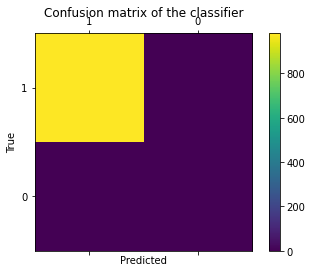

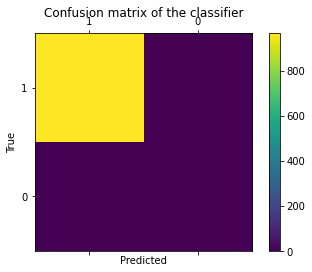

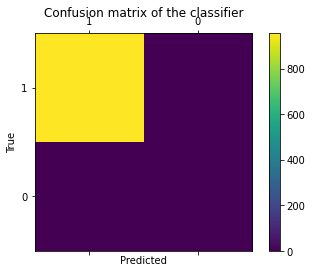

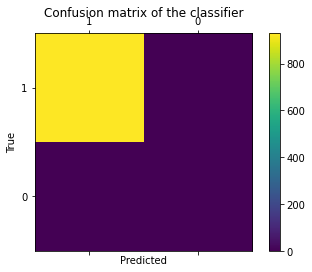

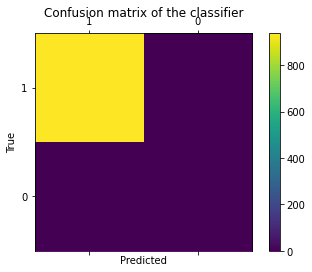

In [34]:
def to_use_SVM(X_train_red_onehot, y_train_red):
  accuracy_scores_svm = []
  for train, val in kf.split(X_train_red_onehot):
    svm_clf = svm.SVC(kernel='rbf', gamma = 0.1, C = 10, probability=True)
    svm_clf = svm_clf.fit(X_train_red_onehot[train], y_train_red[train])
    tp, fn, fp, tn = metrics.confusion_matrix(y_train_red[val], svm_clf.predict(X_train_red_onehot[val])).ravel()
    plot_cm(y_train_red[val], svm_clf.predict(X_train_red_onehot[val]))
    
    accuracy = (tn+tp)/(fp+fn+tp+tn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    fpr = fp/(fp+tn)
    f1 = 2*precision*recall/(precision + recall)
    accuracy_scores_svm.append((accuracy, precision, recall, fpr, f1))


  return np.mean(accuracy_scores_svm, axis=0)

metric_svm = to_use_SVM(X_train_red_onehot, y_train_red)
print(metric_svm)


In [35]:
def to_test_SVM(X_test_red_onehot, y_test_red, X_train_red_onehot, y_train_red):
  svm_clf = svm.SVC(kernel='rbf', gamma = 0.1, C = 10, probability=True)
  svm_clf = svm_clf.fit(X_train_red_onehot, y_train_red)
  tp, fn, fp, tn = metrics.confusion_matrix(y_test_red, svm_clf.predict(X_test_red_onehot)).ravel()
  accuracy = (tn+tp)/(fp+fn+tp+tn)
  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  fpr = fp/(fp+tn)
  f1 = 2*precision*recall/(precision + recall)
  pickle.dump(svm_clf, open("SVM_Final_Model", 'wb'))
  return accuracy

test_accuracy = to_test_SVM(X_test_red_onehot, y_test_red, X_train_red_onehot, y_train_red)
print(test_accuracy)

0.9629127091813658


In [37]:
filename_dt = 'SVM_Final_Model'
loaded_model = pickle.load(open(filename_dt, 'rb'))
tp, fn, fp, tn = metrics.confusion_matrix(y_train_red, loaded_model.predict(X_train_red_onehot)).ravel()
accuracy = (tn+tp)/(fp+fn+tp+tn)
recall = tp/(tp+fn)
fpr = fp/(fp+tn)
print(accuracy)
print(recall)
print(fpr)


0.9795341474445952
0.9786845310596833
0.019397651863195507


In [38]:
filename_dt = 'SVM_Final_Model'
loaded_model = pickle.load(open(filename_dt, 'rb'))
tp, fn, fp, tn = metrics.confusion_matrix(y_test_red, loaded_model.predict(X_test_red_onehot)).ravel()
accuracy = (tn+tp)/(fp+fn+tp+tn)
recall = tp/(tp+fn)
fpr = fp/(fp+tn)
print(accuracy)
print(recall)
print(fpr)

0.9629127091813658
0.9642567018683996
0.03877551020408163


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8844 samples in 0.005s...
[t-SNE] Computed neighbors for 8844 samples in 0.176s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8844
[t-SNE] Computed conditional probabilities for sample 2000 / 8844
[t-SNE] Computed conditional probabilities for sample 3000 / 8844
[t-SNE] Computed conditional probabilities for sample 4000 / 8844
[t-SNE] Computed conditional probabilities for sample 5000 / 8844
[t-SNE] Computed conditional probabilities for sample 6000 / 8844
[t-SNE] Computed conditional probabilities for sample 7000 / 8844
[t-SNE] Computed conditional probabilities for sample 8000 / 8844
[t-SNE] Computed conditional probabilities for sample 8844 / 8844
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.140633
[t-SNE] KL divergence after 1000 iterations: 0.221202


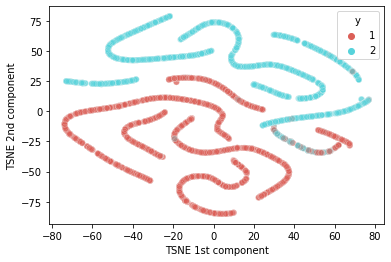

In [47]:
from sklearn.manifold import TSNE

def tsne_analysis():
  """ For TSNE analysis on the training dataset with 
  last hidden layer output"""

  filename_dt = 'SVM_Final_Model'
  loaded_model = pickle.load(open(filename_dt, 'rb'))
  
  hidden_opt = loaded_model.predict_proba(X_train_red_onehot)
  df = pd.DataFrame(hidden_opt)
  df['y'] = y_train_red
  df['label'] = df['y'].apply(lambda i: str(i))
  tsne = TSNE(n_components = 2, perplexity = 50, verbose = 1, n_iter = 1000)
  tsne_res = tsne.fit_transform(hidden_opt)

  df['TSNE 1st component'] = tsne_res[:,0]
  df['TSNE 2nd component'] = tsne_res[:,1]

  sns.scatterplot(
    x = "TSNE 1st component", y = "TSNE 2nd component",
    hue = 'y',
    palette = sns.color_palette("hls", 2),
    data = df,
    legend = "full",
    alpha = 0.3
  )
  plt.show()

tsne_analysis()